# Demo - Topic Network Analysis in Online Communities

## Step 1 : Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as st
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.pyplot import figure, text


import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

import re
import spacy
from nltk.corpus import stopwords

from ipynb.fs.full.helper_functions import *

import networkx as nx

from itertools import permutations
from itertools import combinations

import dataframe_image as dfi
import pickle

## Step 2 : Load datasets

In [2]:
# Read data from csv files
'''Ethereum'''
df_eth_1 = pd.read_csv('../data_2.0/ethereum_posts_reddit.csv')
df_eth_2 = pd.read_csv('../data_2.0/ethereum_comments_reddit.csv')

'''Litecoin'''
df_lit_1 = pd.read_csv('../data_2.0/litecoin_posts_reddit.csv')
df_lit_2 = pd.read_csv('../data_2.0/litecoin_comments_reddit.csv')

'''Dogecoin'''
df_dog_1 = pd.read_csv('../data_2.0/dogecoin_posts_reddit.csv')
df_dog_2 = pd.read_csv('../data_2.0/dogecoin_comments_reddit.csv')

'''NEM'''
df_nem_1 = pd.read_csv('../data_2.0/nem_posts_reddit.csv')
df_nem_2 = pd.read_csv('../data_2.0/nem_comments_reddit.csv')

'''Ripple'''
df_rip_1 = pd.read_csv('../data_2.0/ripple_posts_reddit.csv')
df_rip_2 = pd.read_csv('../data_2.0/ripple_comments_reddit.csv')

# '''Binance'''
# df_bin_1 = pd.read_csv('../data_2.0/binance_posts_reddit.csv')
# df_bin_2 = pd.read_csv('../data_2.0/binance_comments_reddit.csv')

'''Iota'''
df_iot_1 = pd.read_csv('../data_2.0/iota_posts_reddit.csv')
df_iot_2 = pd.read_csv('../data_2.0/iota_comments_reddit.csv')

'''Cardano'''
df_car_1 = pd.read_csv('../data_2.0/cardano_posts_reddit.csv')
df_car_2 = pd.read_csv('../data_2.0/cardano_comments_reddit.csv')


''' -> Add additional data below'''
# df_XXX_1 = pd.read_csv('../data/XXX_posts_reddit.csv')
# df_XXX_2 = pd.read_csv('../data/XXX_comments_reddit.csv')

' -> Add additional data below'

## Step 3 : Pre-processing

In [3]:
'''Ethereum'''
df_eth = preprocess_data(df_eth_1,df_eth_2)

'''Litecoin'''
df_lit = preprocess_data(df_lit_1, df_lit_2)

'''Dogecoin'''
df_dog = preprocess_data(df_dog_1,df_dog_2)

'''NEM'''
df_nem = preprocess_data(df_nem_1,df_nem_2)

'''Ripple'''
df_rip = preprocess_data(df_rip_1,df_rip_2)


'''Iota'''
df_iot = preprocess_data(df_iot_1,df_iot_2)

'''Cardano'''
df_car = preprocess_data(df_car_1,df_car_2)

'''Add additional data below'''
# df_XXX = preprocess_data(df_XXX_1, df_XXX_2)

'Add additional data below'

#### - Example of preprocessed data -

In [4]:
df_eth

,sub_id,text,date
2179,t3_kneuun,How Ethereum 2.0 Can Catapult ethereum to New ...,2020-12-31 00:38:04
2178,t3_knexay,Anyone ever heard of / remember Rivetz? It's n...,2020-12-31 00:41:50
2135,t3_knf0ip,"Help me down the rabbit hole! - Surveys, Votin...",2020-12-31 00:46:43
747,t3_knf0kq,Gas prices Can someone explain why I'm suppose...,2020-12-31 00:46:47
2134,t3_knfgc4,How Ethereum 2.0 Can Catapult ethereum to New ...,2020-12-31 01:10:22
...,...,...,...
97624,t3_ob3zre,It’s also more impressive than Bitcoin because...,2021-07-01 12:06:08
97625,t3_ob3zre,"As much as I agree with this post , Bitcoin ha...",2021-07-01 12:06:59
97626,t3_ob3zre,"As much as I agree with this post , Bitcoin ha...",2021-07-01 12:07:24
97627,t3_ob3zre,How its infinite printing same as fiat no fixe...,2021-07-01 12:07:35


## Step 4 : Data processing

### 4.1 Check and specify time span

In [5]:
'''Ethereum'''
eth_timespan = get_timespan(df_eth)

'''Litecoin'''
lit_timespan = get_timespan(df_lit)

'''Dogecoin'''
dog_timespan = get_timespan(df_dog)

'''NEM'''
nem_timespan = get_timespan(df_nem)

'''Ripple'''
rip_timespan = get_timespan(df_rip)

'''Iota'''
iot_timespan = get_timespan(df_iot)

'''Cardano'''
car_timespan = get_timespan(df_car)

'''Add additional data below'''
# XXX_timespan = get_timespan(df_XXX)

'Add additional data below'

In [6]:
'''Specify a time span below'''
start_date = np.datetime64('2021-01-01')
end_date = np.datetime64('2021-06-30')
timespan = (start_date, end_date)

'''Check for some conditions'''
timespan_list = [eth_timespan, lit_timespan, dog_timespan, nem_timespan, rip_timespan, iot_timespan, car_timespan]
if all(element == timespan for element in timespan_list):
    print("All datasets have the samme time span -> " + str(timespan))
else:
    print("The datasets do not have the same time span.")
    if all(element[0] <= timespan[0] and element[1] >= timespan[1] for element in timespan_list):
        print("We specify the time span to be " + str(timespan))
    else: 
        for i in range(len(timespan_list)):
            print("Dataset " + str(i) + " has time span of " + str(timespan_list[i]))
        raise Exception("ERROR: Check time span of all datasets")

The datasets do not have the same time span.
We specify the time span to be (numpy.datetime64('2021-01-01'), numpy.datetime64('2021-06-30'))


==============================================================================================================================================

### 4.2 Split document based on time frame intervals

#### - Determine a proper time frame -

In [7]:
'''Set timeframe interval to 1 day'''
delta = np.timedelta64(1,'D')
    
num_of_timeframes, timeframe_list = get_timeframes(timespan, delta)
formatted_timeframes_str = get_formatted_timeframes_str(timeframe_list)

#### - Split doucments into smaller documents -

In [8]:
'''Ethereum'''
eth_doc_list = split_doc_by_timeframe(timeframe_list, df_eth)

'''Litecoin'''
lit_doc_list = split_doc_by_timeframe(timeframe_list, df_lit)

'''Dogecoin'''
dog_doc_list = split_doc_by_timeframe(timeframe_list, df_dog)

'''NEM'''
nem_doc_list = split_doc_by_timeframe(timeframe_list, df_nem)

'''Ripple'''
rip_doc_list = split_doc_by_timeframe(timeframe_list, df_rip)

# '''Binance'''
# bin_doc_list = split_doc_by_timeframe(timeframe_list, df_bin)

'''Iota'''
iot_doc_list = split_doc_by_timeframe(timeframe_list, df_iot)

'''Cardano'''
car_doc_list = split_doc_by_timeframe(timeframe_list, df_car)


'''Add additional data below'''
# XXX_doc_list = split_doc_by_timeframe(timeframe_list, df_XXX)

'Add additional data below'

==============================================================================================================================================

### 4.3 Process data (tokenisation, building N-grams and lemmatisation)

In [9]:
'''Ethereum'''
eth_doc_list_ready = [process_words(doc) for doc in eth_doc_list]

eth_numOfSamples_list = [len(doc) for doc in eth_doc_list]
df_eth_processed = get_df_processed(formatted_timeframes_str, eth_numOfSamples_list, eth_doc_list_ready)
df_eth_processed.head()

,Timeframe interval,Sample size,Document,No.of words
Timeframe 1,[ 2021-01-01 - 2021-01-02 ),485,"[[take, chart, throw, log, secret], [metamask,...",166352
Timeframe 2,[ 2021-01-02 - 2021-01-03 ),491,"[[cost, approximately], [thesis, college, issu...",166352
Timeframe 3,[ 2021-01-03 - 2021-01-04 ),1078,"[[fine, food, smart, enough, articulate, lack,...",166352
Timeframe 4,[ 2021-01-04 - 2021-01-05 ),770,"[[offline, mew, wallet, hardware, wallet, offl...",166352
Timeframe 5,[ 2021-01-05 - 2021-01-06 ),662,"[[exactly, tether, shady, peg, reason], [newbi...",166352


In [10]:
'''Litecoin'''
lit_doc_list_ready = [process_words(doc) for doc in lit_doc_list]

lit_numOfSamples_list = [len(doc) for doc in lit_doc_list]
df_lit_processed = get_df_processed(formatted_timeframes_str, lit_numOfSamples_list, lit_doc_list_ready)
df_lit_processed.head()

,Timeframe interval,Sample size,Document,No.of words
Timeframe 1,[ 2021-01-01 - 2021-01-02 ),107,"[[price, range, buy, fractional, share, stock,...",42290
Timeframe 2,[ 2021-01-02 - 2021-01-03 ),120,"[[litecoin, planning, add, privacy, therefore,...",42290
Timeframe 3,[ 2021-01-03 - 2021-01-04 ),195,"[[fly, away], [], [guess], [short], [take, con...",42290
Timeframe 4,[ 2021-01-04 - 2021-01-05 ),154,"[[give, grandkid], [ath], [beautiful], [liteco...",42290
Timeframe 5,[ 2021-01-05 - 2021-01-06 ),226,"[[join, interest, bearing, litecoin, platform,...",42290


In [11]:
'''Dogecoin'''
dog_doc_list_ready = [process_words(doc) for doc in dog_doc_list]

dog_numOfSamples_list = [len(doc) for doc in dog_doc_list]
df_dog_processed = get_df_processed(formatted_timeframes_str, dog_numOfSamples_list, dog_doc_list_ready)
df_dog_processed.head()

,Timeframe interval,Sample size,Document,No.of words
Timeframe 1,[ 2021-01-01 - 2021-01-02 ),755,"[[buy, dogecoin, directly, binance, usd, direc...",1576855
Timeframe 2,[ 2021-01-02 - 2021-01-03 ),5563,"[[learn, speak], [idk, little, extra, spend, p...",1576855
Timeframe 3,[ 2021-01-03 - 2021-01-04 ),4254,"[[predict, correct], [hell, get, dollar, wait]...",1576855
Timeframe 4,[ 2021-01-04 - 2021-01-05 ),2774,"[[answer, large, handle, bot, dogecoin, worth,...",1576855
Timeframe 5,[ 2021-01-05 - 2021-01-06 ),2076,"[[wait, connect, peer, network, congestion, ea...",1576855


In [12]:
'''NEM'''
nem_doc_list_ready = [process_words(doc) for doc in nem_doc_list]

nem_numOfSamples_list = [len(doc) for doc in nem_doc_list]
df_nem_processed = get_df_processed(formatted_timeframes_str, nem_numOfSamples_list, nem_doc_list_ready)
df_nem_processed.head()

,Timeframe interval,Sample size,Document,No.of words
Timeframe 1,[ 2021-01-01 - 2021-01-02 ),16,"[[jump, hour, significance, justify, spike, co...",4313
Timeframe 2,[ 2021-01-02 - 2021-01-03 ),6,"[[fine, hold], [], [nice, harvest, reward, ave...",4313
Timeframe 3,[ 2021-01-03 - 2021-01-04 ),6,"[[glad, get, testnet], [launch, symbol, public...",4313
Timeframe 4,[ 2021-01-04 - 2021-01-05 ),11,"[[partnership, demonstration, commitment, stre...",4313
Timeframe 5,[ 2021-01-05 - 2021-01-06 ),14,"[[encourage, participate, poi, voting, regard,...",4313


In [13]:
'''Ripple'''
rip_doc_list_ready = [process_words(doc) for doc in rip_doc_list]

rip_numOfSamples_list = [len(doc) for doc in rip_doc_list]
df_rip_processed = get_df_processed(formatted_timeframes_str, rip_numOfSamples_list, rip_doc_list_ready)
df_rip_processed.head()

,Timeframe interval,Sample size,Document,No.of words
Timeframe 1,[ 2021-01-01 - 2021-01-02 ),351,"[[exactly, truth, bitcoin, recognize, curreny,...",37362
Timeframe 2,[ 2021-01-02 - 2021-01-03 ),297,"[[analysis], [definitely, bitcoin, massive, se...",37362
Timeframe 3,[ 2021-01-03 - 2021-01-04 ),397,"[[suit, participate, possibility, powerful, ba...",37362
Timeframe 4,[ 2021-01-04 - 2021-01-05 ),343,"[[fud, crybaby, sit, sideline, angry, coin, pu...",37362
Timeframe 5,[ 2021-01-05 - 2021-01-06 ),399,"[[jerk], [today, theory, bitstamp, liquid, pra...",37362


In [14]:
'''Iota'''
iot_doc_list_ready = [process_words(doc) for doc in iot_doc_list]

iot_numOfSamples_list = [len(doc) for doc in iot_doc_list]
df_iot_processed = get_df_processed(formatted_timeframes_str, iot_numOfSamples_list, iot_doc_list_ready)
df_iot_processed.head()

,Timeframe interval,Sample size,Document,No.of words
Timeframe 1,[ 2021-01-01 - 2021-01-02 ),15,"[[blockchain], [owl, summary, disclaimer, arbi...",34944
Timeframe 2,[ 2021-01-02 - 2021-01-03 ),36,"[[build, dex, get, involve], [importance, pred...",34944
Timeframe 3,[ 2021-01-03 - 2021-01-04 ),106,"[[keep, discord], [world, president, free, wor...",34944
Timeframe 4,[ 2021-01-04 - 2021-01-05 ),201,"[[invest, iota], [post, seem, price, market, o...",34944
Timeframe 5,[ 2021-01-05 - 2021-01-06 ),123,"[[late, conversation, simple, gon, trash, turn...",34944


In [15]:
'''Cardano'''
car_doc_list_ready = [process_words(doc) for doc in car_doc_list]

car_numOfSamples_list = [len(doc) for doc in car_doc_list]
df_car_processed = get_df_processed(formatted_timeframes_str, car_numOfSamples_list, car_doc_list_ready)
df_car_processed.head()

,Timeframe interval,Sample size,Document,No.of words
Timeframe 1,[ 2021-01-01 - 2021-01-02 ),441,"[[consider, move, investment, dot, next, month...",414505
Timeframe 2,[ 2021-01-02 - 2021-01-03 ),385,"[[lend, platform, return, back, lender, lender...",414505
Timeframe 3,[ 2021-01-03 - 2021-01-04 ),532,"[[huge, opportunity, thrive, ability, scale, w...",414505
Timeframe 4,[ 2021-01-04 - 2021-01-05 ),613,"[[], [feel, old], [], [turn, start, invest, cr...",414505
Timeframe 5,[ 2021-01-05 - 2021-01-06 ),960,"[[welcome, gang, wish, good, together, change,...",414505


In [16]:
'''Add additional data below'''
# XXX_doc_list_ready = [process_words(doc) for doc in XXX_doc_list]

# XXX_numOfSamples_list = [len(doc) for doc in XXX_doc_list]
# df_XXX_processed = get_df_processed(formatted_timeframes_str, XXX_numOfSamples_list, XXX_doc_list_ready)
# df_XXX_processed.head()

'Add additional data below'

==============================================================================================================================================

In [17]:
save_list('../var_saved_6_months/eth_doc_list_ready.pkl', eth_doc_list_ready)
df_eth_processed.to_pickle("../var_saved_6_months/df_eth_processed.pkl")

save_list('../var_saved_6_months/lit_doc_list_ready.pkl', lit_doc_list_ready)
df_lit_processed.to_pickle("../var_saved_6_months/df_lit_processed.pkl")

save_list('../var_saved_6_months/dog_doc_list_ready.pkl', dog_doc_list_ready)
df_dog_processed.to_pickle("../var_saved_6_months/df_dog_processed.pkl")

save_list('../var_saved_6_months/nem_doc_list_ready.pkl', nem_doc_list_ready)
df_nem_processed.to_pickle("../var_saved_6_months/df_nem_processed.pkl")

save_list('../var_saved_6_months/rip_doc_list_ready.pkl', rip_doc_list_ready)
df_rip_processed.to_pickle("../var_saved_6_months/df_rip_processed.pkl")

save_list('../var_saved_6_months/iot_doc_list_ready.pkl', iot_doc_list_ready)
df_iot_processed.to_pickle("../var_saved_6_months/df_iot_processed.pkl")

save_list('../var_saved_6_months/car_doc_list_ready.pkl', car_doc_list_ready)
df_car_processed.to_pickle("../var_saved_6_months/df_car_processed.pkl")

==============================================================================================================================================

### 4.4 Create the Dictionary and Corpus for Topic Modeling

In [18]:
'''Ethereum'''
eth_id2word, eth_corpus = convert_to_bagOfWords(eth_doc_list_ready)

'''Litecoin'''
lit_id2word, lit_corpus = convert_to_bagOfWords(lit_doc_list_ready)

'''Dogecoin'''
dog_id2word, dog_corpus = convert_to_bagOfWords(dog_doc_list_ready)

'''NEM'''
nem_id2word, nem_corpus = convert_to_bagOfWords(nem_doc_list_ready)

'''Ripple'''
rip_id2word, rip_corpus = convert_to_bagOfWords(rip_doc_list_ready)

'''Iota'''
iot_id2word, iot_corpus = convert_to_bagOfWords(iot_doc_list_ready)

'''Cardano'''
car_id2word, car_corpus = convert_to_bagOfWords(car_doc_list_ready)


'''Add additional data below'''
# XXX_id2word, XXX_corpus = convert_to_bagOfWords(XXX_doc_list_ready)

'Add additional data below'

In [19]:
save_list('../var_saved_6_months/eth_id2word.pkl', eth_id2word)
save_list('../var_saved_6_months/eth_corpus.pkl', eth_corpus)

## Step 5: Topic Modeling

### • LDA with Gensim

In [20]:
num_of_topics = 10
num_topics_list = [num_of_topics] * num_of_timeframes

In [21]:
'''Ethereum'''
eth_topics_list = get_topics_with_lda_models(eth_corpus, eth_id2word, num_topics_list)
df_eth_topics = get_df_topics(eth_topics_list)
df_eth_topics.head()

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10
Timeframe 1,bitcoin,buy,daily,ethereum,good,price,youtube,-,-,-
Timeframe 2,antigravity,bitcoin,blockchain,chain,ethereum,get,-,-,-,-
Timeframe 3,bitcoin,buy,crypto,ethereum,get,post,price,robinhood,time,-
Timeframe 4,bitcoin,ethereum,fee,fsync,upgrade,wallet,-,-,-,-
Timeframe 5,bitcoin,chain,ethereum,get,point,-,-,-,-,-


In [22]:
'''Litecoin'''
lit_topics_list = get_topics_with_lda_models(lit_corpus, lit_id2word, num_topics_list)
df_lit_topics = get_df_topics(lit_topics_list)
df_lit_topics.head()

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10
Timeframe 1,bitcoin,buy,litecoin,mar,pump,-,-,-,-,-
Timeframe 2,bad,get,litecoin,mweb,-,-,-,-,-,-
Timeframe 3,bitcoin,channel,litecoin,price,wallet,-,-,-,-,-
Timeframe 4,coin,good,interest,litecoin,sell,stock,wallet,-,-,-
Timeframe 5,bitcoin,buy,coin,litecoin,-,-,-,-,-,-


In [23]:
'''Dogecoin'''
dog_topics_list = get_topics_with_lda_models(dog_corpus, dog_id2word, num_topics_list)
df_dog_topics = get_df_topics(dog_topics_list)
df_dog_topics.head()

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10
Timeframe 1,dogecoin,get,-,-,-,-,-,-,-,-
Timeframe 2,buy,dogecoin,get,hodl,hold,sell,take,wallet,-,-
Timeframe 3,buy,dogecoin,good,meme,moon,wallet,-,-,-,-
Timeframe 4,buy,dogecoin,hodl,market,transaction,-,-,-,-,-
Timeframe 5,buy,dogecoin,get,wait,-,-,-,-,-,-


In [24]:
'''NEM'''
nem_topics_list = get_topics_with_lda_models(nem_corpus, nem_id2word, num_topics_list)
df_nem_topics = get_df_topics(nem_topics_list)
df_nem_topics.head()

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10
Timeframe 1,bitcoin,chart,cryptocurrency,finally,fund,image,market,symbol,-,-
Timeframe 2,bitcoin,fine,hold,reward,shark,-,-,-,-,-
Timeframe 3,chain,hodl,preformace,symbol,testnet,-,-,-,-,-
Timeframe 4,bitcoin,bittrex,brand,partnership,postpone,symbol,-,-,-,-
Timeframe 5,bittrex,coin,opt,reward,snapshot,support,sure,symbol,-,-


In [25]:
'''Ripple'''
rip_topics_list = get_topics_with_lda_models(rip_corpus, rip_id2word, num_topics_list)
df_rip_topics = get_df_topics(rip_topics_list)
df_rip_topics.head()

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10
Timeframe 1,buy,case,dollar,exchange,get,money,ripple,take,update,-
Timeframe 2,bitcoin,buy,coin,exchange,guy,lawsuit,time,wallet,-,-
Timeframe 3,bitcoin,buy,get,lawsuit,money,petition,time,-,-,-
Timeframe 4,buy,coin,community,exchange,market,price,ripple,trading,wallet,-
Timeframe 5,bank,get,news,ripple,security,sell,-,-,-,-


In [26]:
'''Iota'''
iot_topics_list = get_topics_with_lda_models(iot_corpus, iot_id2word, num_topics_list)
df_iot_topics = get_df_topics(iot_topics_list)
df_iot_topics.head()

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10
Timeframe 1,attention,blockchain,dex,get,increase,nice,post,release,stand,-
Timeframe 2,cleaning,develop,hack,hype,issue,ledger,post,run,trinity,wallet
Timeframe 3,consider,coordicide,get,iota,limit,post,sure,transaction,wallet,-
Timeframe 4,comment,community,company,good,hype,iota,post,vote,-,-
Timeframe 5,contract,fee,post,price,project,seed,smart,transaction,world,worth


In [27]:
'''Cardano'''
car_topics_list = get_topics_with_lda_models(car_corpus, car_id2word, num_topics_list)
df_car_topics = get_df_topics(car_topics_list)
df_car_topics.head()

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10
Timeframe 1,coin,comment,get,keep,post,stake,wallet,-,-,-
Timeframe 2,bitcoin,buy,contract,get,pool,stake,wallet,-,-,-
Timeframe 3,bitcoin,community,get,move,pool,price,stake,wallet,-,-
Timeframe 4,buy,community,fund,project,stake,take,video,wallet,-,-
Timeframe 5,bitcoin,fee,get,great,pool,price,time,wallet,-,-


In [28]:
'''Union topics'''
union_topics_list = [list(set().union(eth_topics, lit_topics, dog_topics, nem_topics, rip_topics, iot_topics, car_topics)) for eth_topics, lit_topics, dog_topics, nem_topics, rip_topics, iot_topics, car_topics in zip(eth_topics_list, lit_topics_list, dog_topics_list, nem_topics_list, rip_topics_list, iot_topics_list, car_topics_list)]
df_union_topics = get_df_topics(union_topics_list)
df_union_topics.head(10)

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,...,Topic 40,Topic 41,Topic 42,Topic 43,Topic 44,Topic 45,Topic 46,Topic 47,Topic 48,Topic 49
Timeframe 1,image,litecoin,attention,dogecoin,case,get,comment,exchange,chart,stand,...,-,-,-,-,-,-,-,-,-,-
Timeframe 2,run,shark,litecoin,antigravity,dogecoin,mweb,get,cleaning,pool,exchange,...,-,-,-,-,-,-,-,-,-,-
Timeframe 3,coordicide,litecoin,petition,dogecoin,limit,preformace,transaction,get,pool,hodl,...,-,-,-,-,-,-,-,-,-,-
Timeframe 4,fee,fsync,litecoin,dogecoin,transaction,comment,exchange,upgrade,hype,postpone,...,-,-,-,-,-,-,-,-,-,-
Timeframe 5,opt,fee,litecoin,dogecoin,transaction,wait,get,smart,pool,worth,...,-,-,-,-,-,-,-,-,-,-
Timeframe 6,opt,fee,litecoin,dogecoin,account,transaction,get,pool,reliable,many,...,-,-,-,-,-,-,-,-,-,-
Timeframe 7,energy,fee,opt,litecoin,tokenized,dogecoin,account,project,provide,get,...,-,-,-,-,-,-,-,-,-,-
Timeframe 8,litecoin,bitrue,dogecoin,get,pool,exchange,dust,back,value,release,...,-,-,-,-,-,-,-,-,-,-
Timeframe 9,agree,review,litecoin,dogecoin,case,true,get,exchange,poi,value,...,-,-,-,-,-,-,-,-,-,-
Timeframe 10,opt,eta,coordicide,claim,litecoin,dogecoin,transaction,launch,get,pool,...,-,-,-,-,-,-,-,-,-,-


==============================================================================================================================================

In [30]:
save_list('../var_saved_6_months/eth_topics_list.pkl', eth_topics_list)
df_eth_topics.to_pickle("../var_saved_6_months/df_eth_topics.pkl")

save_list('../var_saved_6_months/lit_topics_list.pkl', lit_topics_list)
df_lit_topics.to_pickle("../var_saved_6_months/df_lit_topics.pkl")

save_list('../var_saved_6_months/dog_topics_list.pkl', dog_topics_list)
df_dog_topics.to_pickle("../var_saved_6_months/df_dog_topics.pkl")

save_list('../var_saved_6_months/nem_topics_list.pkl', nem_topics_list)
df_nem_topics.to_pickle("../var_saved_6_months/df_nem_topics.pkl")

save_list('../var_saved_6_months/rip_topics_list.pkl', rip_topics_list)
df_rip_topics.to_pickle("../var_saved_6_months/df_rip_topics.pkl")

# save_list('../var_saved_6_months/bin_topics_list.pkl', bin_topics_list)
# df_bin_topics.to_pickle("../var_saved_6_months/df_bin_topics.pkl")

save_list('../var_saved_6_months/iot_topics_list.pkl', iot_topics_list)
df_iot_topics.to_pickle("../var_saved_6_months/df_iot_topics.pkl")

save_list('../var_saved_6_months/car_topics_list.pkl', car_topics_list)
df_car_topics.to_pickle("../var_saved_6_months/df_car_topics.pkl")

# save_list('../var_saved_6_months/union_topics_list.pkl', union_topics_list)
# df_union_topics.to_pickle("../var_saved_6_months/df_union_topics.pkl")

## Step 6 : Network analysis

### • Build networks

In [31]:
G_list = [None] * num_of_timeframes
node_pair_list = [None] * num_of_timeframes
union_topics_list = [None] * num_of_timeframes

for i in range(num_of_timeframes):
    '''Add additional data below'''
    topics_list = [eth_topics_list[i], lit_topics_list[i], dog_topics_list[i], nem_topics_list[i], rip_topics_list[i], iot_topics_list[i], car_topics_list[i]]
    
    union_topics_list[i] = list(set().union(*topics_list))
    
    G_list[i] = nx.DiGraph()
    nodes = list(set().union(*topics_list))
    G_list[i].add_nodes_from(nodes)
    
    node_pair_list[i] = get_node_pair_list(topics_list)
    if i == 0:
        G_list[i].add_edges_from(node_pair_list[i])
    else:
        new_node_list = list(set(union_topics_list[i]) - set(union_topics_list[i-1]))
        new_to_old_pair_list = []
        for j in range(len(node_pair_list[i])):
            if node_pair_list[i][j][0] in new_node_list and node_pair_list[i][j][1] not in new_node_list:
                new_to_old_pair_list.append(node_pair_list[i][j])
        G_list[i].add_edges_from(list(set(node_pair_list[i]) - set(new_to_old_pair_list)))
        
    ebc = nx.edge_betweenness_centrality(G_list[i], normalized=False)
    nx.set_edge_attributes(G_list[i], ebc, 'betweenness')
    nx.write_graphml(G_list[i], 'network.graphml')

==============================================================================================================================================

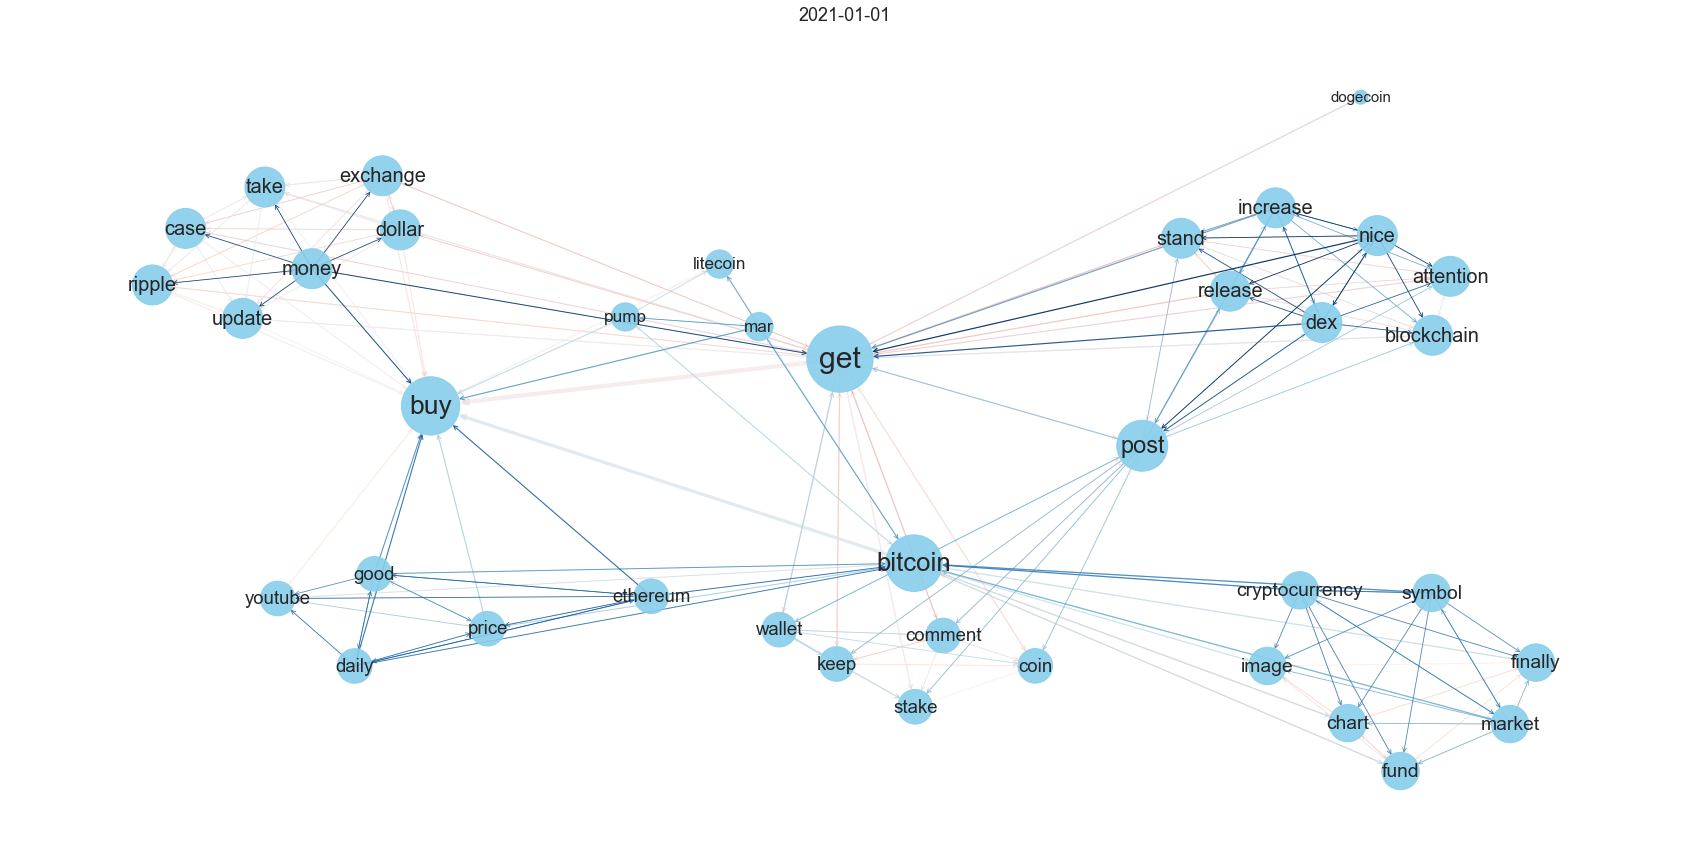

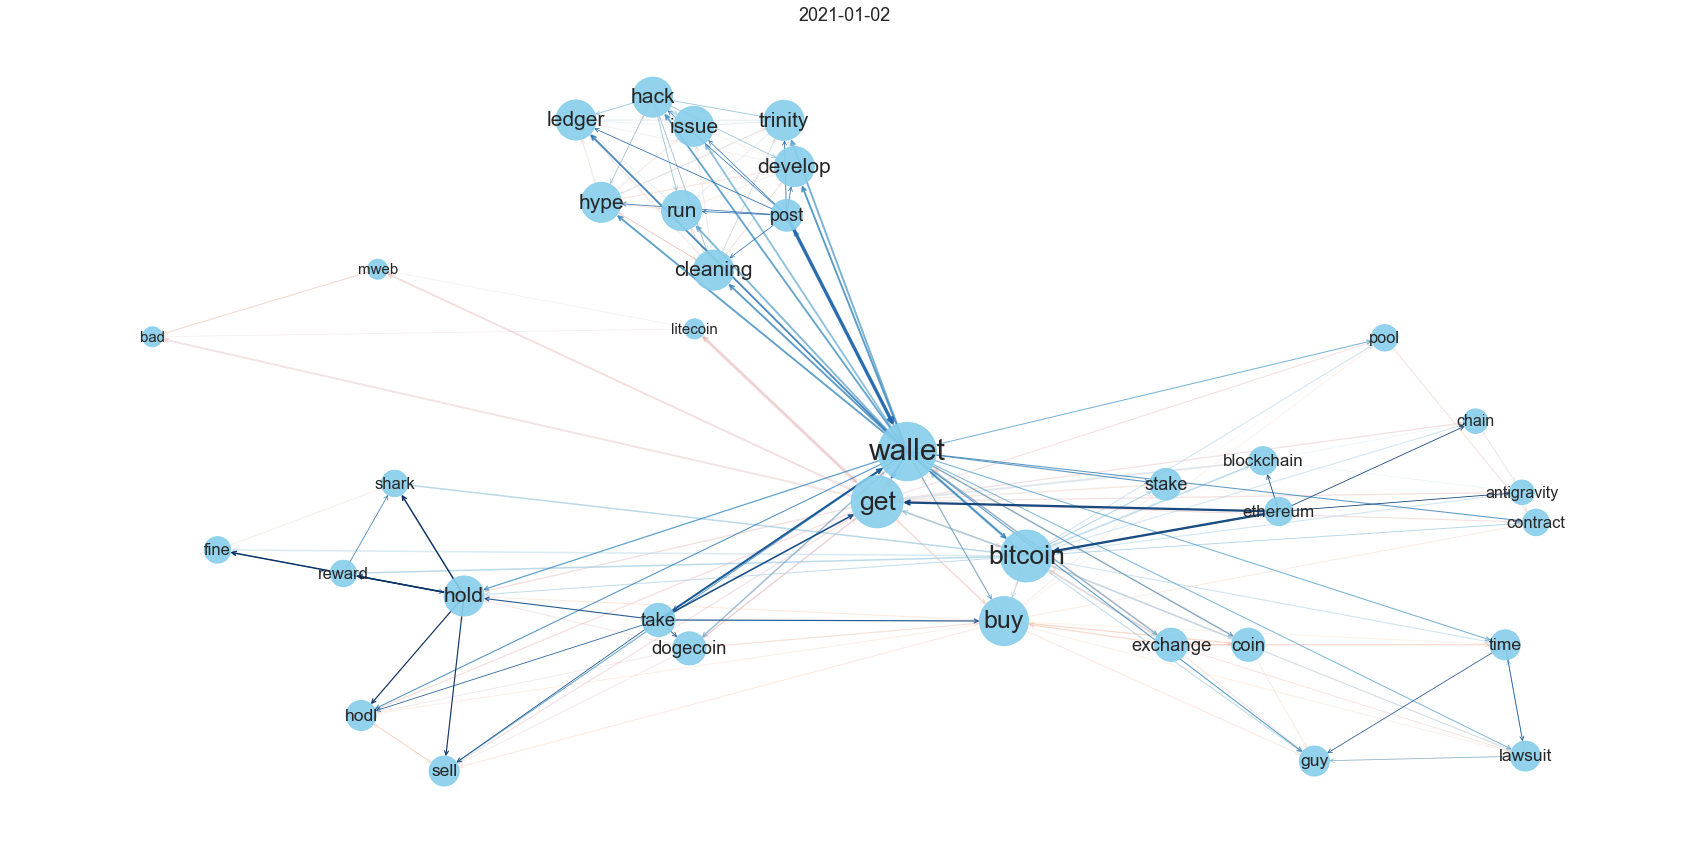

In [53]:
start_date = timespan[0]
end_date = timespan[1]+1
dates = np.arange(start_date, end_date, dtype='datetime64[D]')
t_min = 0.8
t_max = 4
s_min = 15
s_max = 30


for i in range(2):
    fig = plt.figure(i, figsize=(30, 15))
    plt.axis('off')
    plt.title(dates[i], fontsize = 18)
    pos = nx.spring_layout(G_list[i], k=0.6)
    d = dict(G_list[i].degree)
    
    widths = nx.get_edge_attributes(G_list[i], 'betweenness')
    
    values = widths.values()
    w_min = min(values)
    w_max = max(values)
    
    if w_min == w_max:
        norm_widths = widths
    else:
        norm_widths = {key: ((v - w_min) / (w_max - w_min)) * (t_max - t_min) + t_min  for (key, v) in widths.items()}

        
    M = G_list[i].number_of_edges()
    edge_colors = range(2, M + 2)
    edge_alphas = [(5 + j) / (M + 4) for j in range(M)]
    cmap = plt.cm.RdBu

    nodes = nx.draw_networkx_nodes(G_list[i], pos = pos, node_size =[v * 100 for v in d.values()], with_labels=True, node_color = 'skyblue', alpha = 0.9)
    edges = nx.draw_networkx_edges(G_list[i], pos = pos, node_size =[v * 100 for v in d.values()], arrowstyle="->", width = list(norm_widths.values()), edge_color = edge_colors, edge_cmap=cmap)
    
    # set alpha value for each edge
    for k in range(M):
        edges[k].set_alpha(edge_alphas[k])
        
    w_min = min(d.values())
    w_max = max(d.values())
    
    size = {key: ((v - w_min) / (w_max - w_min)) * (s_max - s_min) + s_min  for (key, v) in d.items()}
    
#     nx.draw_networkx_labels(G_list[i], pos = pos,font_size = 15)
    for node, (x, y) in pos.items():
        text(x, y, node, fontsize=size[node], ha='center', va='center')
    
#     pc = mpl.collections.PatchCollection(edges, cmap=cmap)
#     pc.set_array(edge_colors)
#     plt.colorbar(pc)

#     ax = plt.gca()
#     ax.set_axis_off()
    
    if i < 10:
        plt.savefig('../image_demo_6_months/Network_' + str(dates[i]), bbox_inches='tight', dpi = 500)

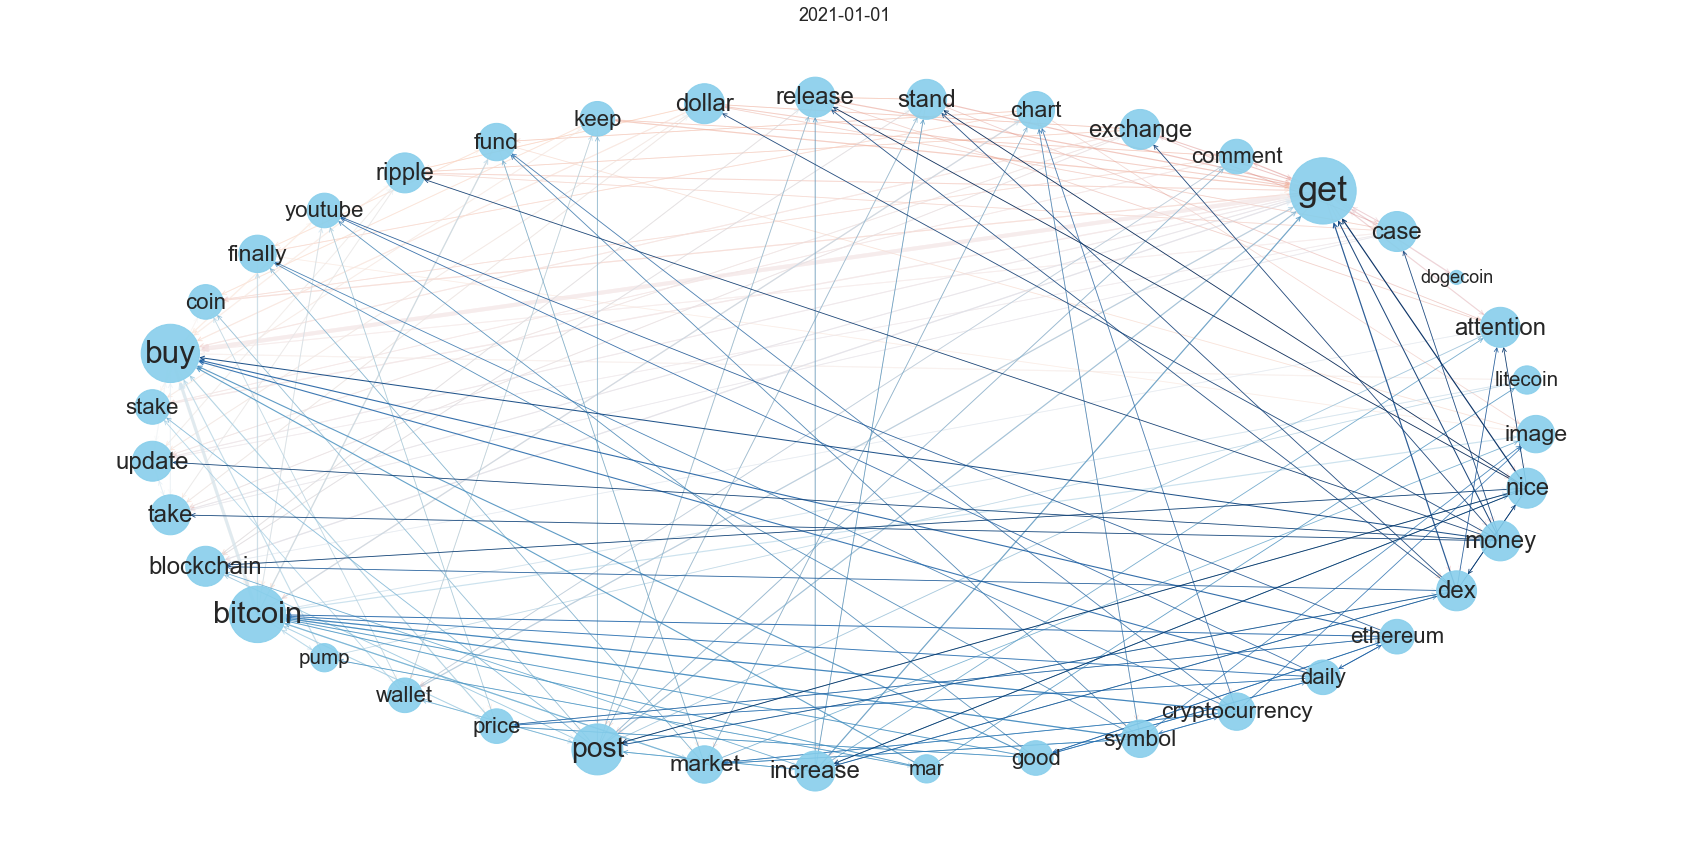

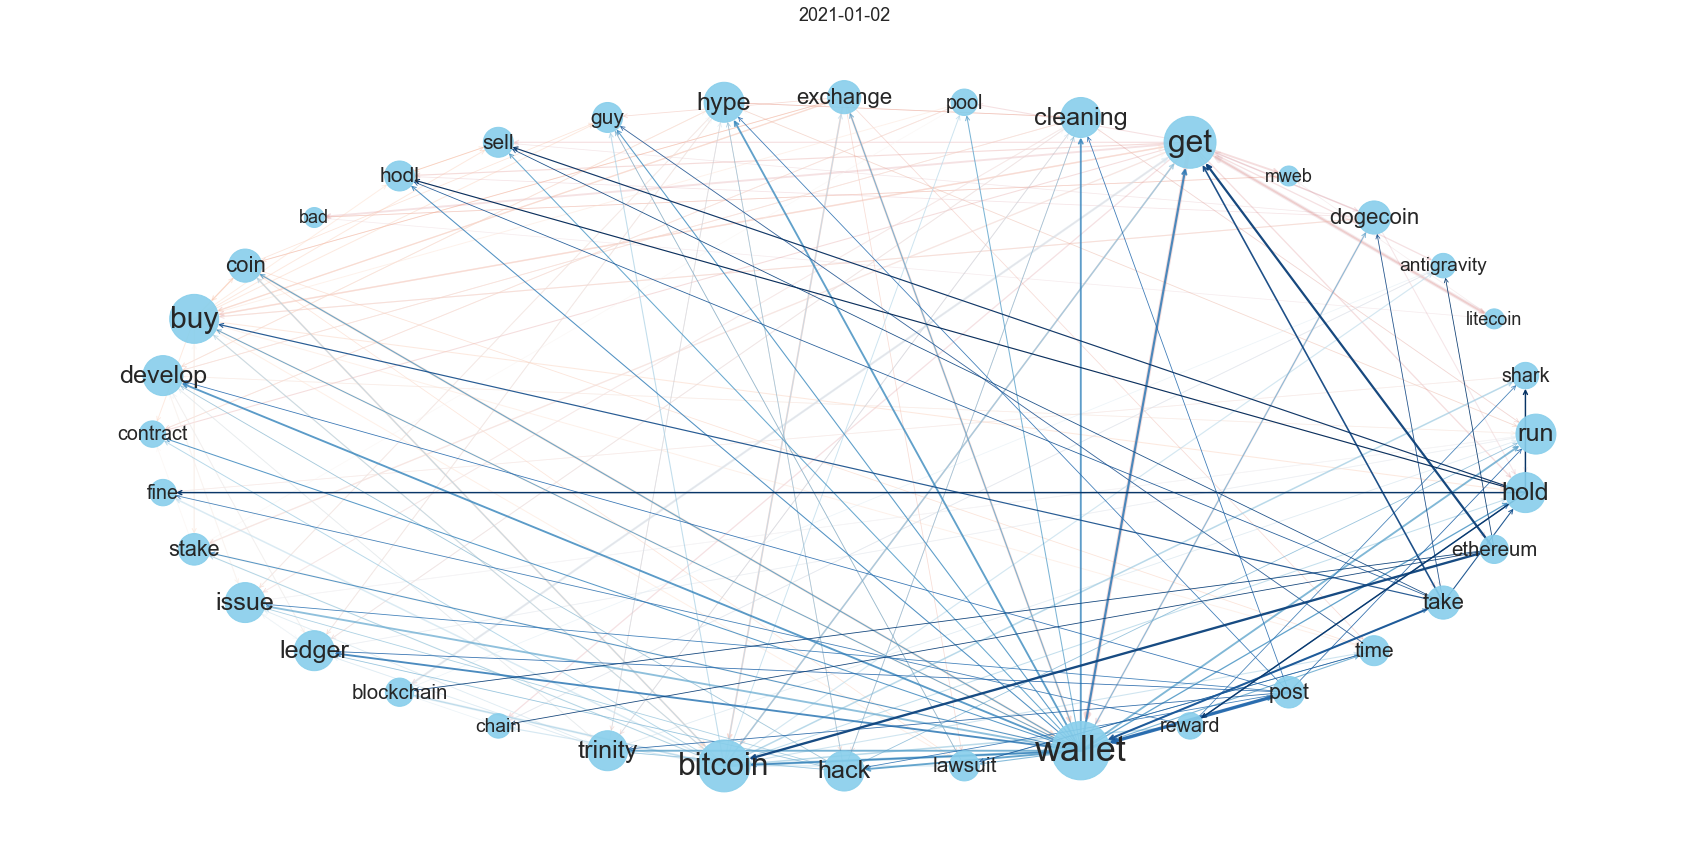

In [56]:
start_date = timespan[0]
end_date = timespan[1]+1
dates = np.arange(start_date, end_date, dtype='datetime64[D]')
t_min = 0.8
t_max = 4
s_min = 18
s_max = 36


for i in range(2):
    fig = plt.figure(i, figsize=(30, 15))
    plt.axis('off')
    plt.title(dates[i], fontsize = 18)
    pos = nx.circular_layout(G_list[i])
    d = dict(G_list[i].degree)
    
    widths = nx.get_edge_attributes(G_list[i], 'betweenness')
    
    values = widths.values()
    w_min = min(values)
    w_max = max(values)
    
    if w_min == w_max:
        norm_widths = widths
    else:
        norm_widths = {key: ((v - w_min) / (w_max - w_min)) * (t_max - t_min) + t_min  for (key, v) in widths.items()}

        
    M = G_list[i].number_of_edges()
    edge_colors = range(2, M + 2)
    edge_alphas = [(5 + j) / (M + 4) for j in range(M)]
    cmap = plt.cm.RdBu

    nodes = nx.draw_networkx_nodes(G_list[i], pos = pos, node_size =[v * 100 for v in d.values()], with_labels=True, node_color = 'skyblue', alpha = 0.9)
    edges = nx.draw_networkx_edges(G_list[i], pos = pos, node_size =[v * 100 for v in d.values()], arrowstyle="->", width = list(norm_widths.values()), edge_color = edge_colors, edge_cmap=cmap)
    
    # set alpha value for each edge
    for k in range(M):
        edges[k].set_alpha(edge_alphas[k])
        
    w_min = min(d.values())
    w_max = max(d.values())
    
    size = {key: ((v - w_min) / (w_max - w_min)) * (s_max - s_min) + s_min  for (key, v) in d.items()}
    
#     nx.draw_networkx_labels(G_list[i], pos = pos,font_size = 15)
    for node, (x, y) in pos.items():
        text(x, y, node, fontsize=size[node], ha='center', va='center')
    
#     pc = mpl.collections.PatchCollection(edges, cmap=cmap)
#     pc.set_array(edge_colors)
#     plt.colorbar(pc)

#     ax = plt.gca()
#     ax.set_axis_off()
    
    if i < 10:
        plt.savefig('../image_demo_6_months/Network_' + str(dates[i]) + '_Circular', bbox_inches='tight', dpi = 500)

### • Centrality measure

#### - Degree centrality -
The degree of a node is the number of other nodes to which it is connected

In [33]:
dc = []
for i in range(num_of_timeframes):
    degree_centrality = nx.degree_centrality(G_list[i])
    dc = dc + sorted(degree_centrality.items(), key=lambda x:x[1], reverse=True)[:3]
    
reshaped_dc = np.reshape(dc, (num_of_timeframes, 6))
df_dc = pd.DataFrame(reshaped_dc)
df_dc.index = dates
for i in range(1, 6, 2):
    df_dc[i] = df_dc[i].astype(float).round(2)

df_dc.rename(columns={0: 'Top 1', 1: 'Degree centrality 1',
                      2: 'Top 2', 3: 'Degree centrality 2',
                      4: 'Top 3', 5: 'Degree centrality 3',}, inplace=True)
df_dc.head(10)

,Top 1,Degree centrality 1,Top 2,Degree centrality 2,Top 3,Degree centrality 3
2021-01-01,get,1.16,buy,0.89,bitcoin,0.84
2021-01-02,wallet,0.97,get,0.77,bitcoin,0.77
2021-01-03,get,0.94,wallet,0.88,bitcoin,0.85
2021-01-04,wallet,0.84,community,0.73,buy,0.62
2021-01-05,get,0.77,fee,0.60,price,0.60
2021-01-06,buy,1.03,wallet,0.86,bitcoin,0.73
2021-01-07,bitcoin,0.75,wallet,0.75,crypto,0.75
2021-01-08,get,0.61,good,0.61,buy,0.53
2021-01-09,exchange,0.71,wallet,0.69,good,0.63
2021-01-10,get,1.03,wallet,0.81,bitcoin,0.56


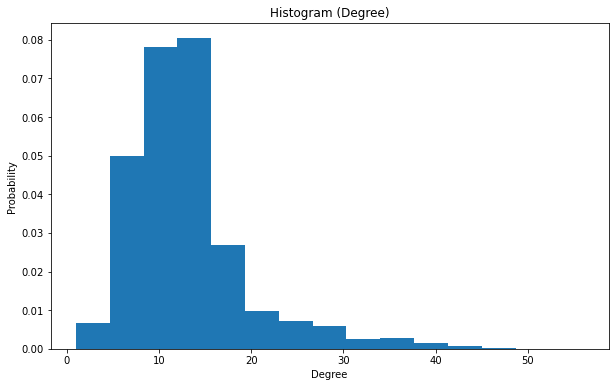

In [34]:
degrees = []
for i in range(num_of_timeframes):
    degrees.append([G_list[i].degree(n) for n in G_list[i].nodes()])

degrees = flatten(degrees)
plt.figure(figsize=(10, 6))
plt.hist(degrees,density=True, bins=15, label="Data")
plt.ylabel('Probability')
plt.xlabel('Degree');
plt.title("Histogram (Degree)");
plt.savefig('../image_demo_6_months/Degree Distribution (Undirected).png', bbox_inches='tight', dpi = 500)
plt.show()

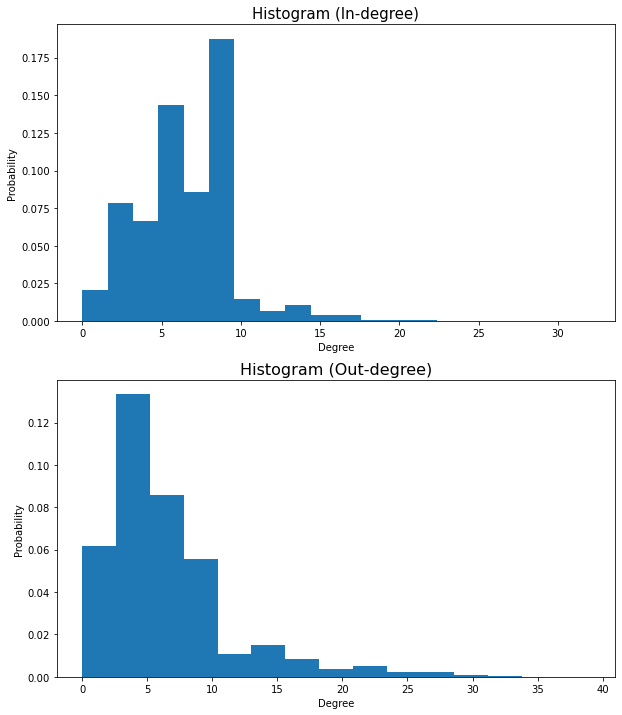

In [35]:
fig=plt.figure(figsize=(10, 12))
columns = 1
rows = 2


fig.add_subplot(rows, columns, 1)
idc = []
for i in range(num_of_timeframes):
    in_degree_centrality = G_list[i].in_degree()
    idc.append(list(dict(in_degree_centrality).values()))
degrees = flatten(idc)
plt.hist(degrees,density=True, bins=20, label="Data")
plt.ylabel('Probability')
plt.xlabel('Degree');
plt.title("Histogram (In-degree)", fontsize = 15);


fig.add_subplot(rows, columns, 2)
odc = []
for i in range(num_of_timeframes):
    out_degree_centrality = G_list[i].out_degree()
    odc.append(list(dict(out_degree_centrality).values()))
degrees = flatten(odc)
# plt.figure(figsize=(10, 6))
plt.hist(degrees,density=True, bins=15, label="Data")
plt.ylabel('Probability')
plt.xlabel('Degree');
plt.title("Histogram (Out-degree)", fontsize = 16);
plt.savefig('../image_demo_6_months/Degree Distributions (Directed).png', bbox_inches='tight', dpi = 500)
plt.show()

In [36]:
dfi.export(df_dc.head(), '../image_demo_6_months/degree_centrality.png')

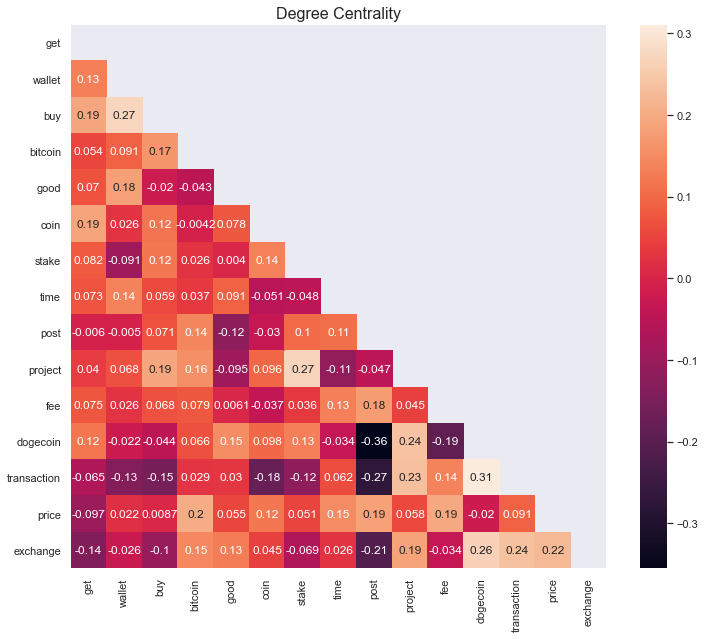

,get,wallet,buy,bitcoin,good,coin,stake,time,post,project,fee,dogecoin,transaction,price,exchange
2021-01-01,1.157895,0.971429,0.894737,0.842105,0.486486,0.540541,0.361111,0.515152,0.684211,0.371429,0.600000,0.314286,0.393939,0.606061,0.421053
2021-01-02,0.771429,0.971429,0.685714,0.771429,0.486486,0.540541,0.361111,0.515152,0.660287,0.371429,0.600000,0.314286,0.393939,0.606061,0.314286
2021-01-03,0.939394,0.878788,0.727273,0.848485,0.486486,0.540541,0.361111,0.515152,0.636364,0.371429,0.600000,0.316667,0.393939,0.606061,0.319305
2021-01-04,0.855411,0.837838,0.621622,0.351351,0.486486,0.540541,0.361111,0.511364,0.503896,0.371429,0.600000,0.319048,0.382684,0.297297,0.324324
2021-01-05,0.771429,0.851351,0.824324,0.571429,0.517643,0.428571,0.361111,0.507576,0.371429,0.371429,0.600000,0.321429,0.371429,0.600000,0.340465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-26,0.577778,0.511111,0.600000,0.585366,0.511111,0.477273,0.392045,0.355556,0.630435,0.349224,0.406941,0.331818,0.337537,0.369565,0.372727
2021-06-27,0.947368,0.454377,0.394737,0.585366,0.457197,0.477273,0.443182,0.350673,0.630435,0.346452,0.447368,0.368182,0.342105,0.369565,0.359091
2021-06-28,0.795455,0.397643,0.561005,0.585366,0.403283,0.477273,0.494318,0.345791,0.630435,0.343681,0.447368,0.404545,0.398325,0.369565,0.345455
2021-06-29,0.636364,0.340909,0.727273,0.585366,0.349369,0.477273,0.545455,0.340909,0.630435,0.340909,0.447368,0.440909,0.454545,0.369565,0.331818


In [37]:
dc = []
for i in range(num_of_timeframes):
    degree_centrality = nx.degree_centrality(G_list[i])
    dc = dc + sorted(degree_centrality.items(), key=lambda x:x[1], reverse=True)[:15]
sorted_dict = get_sorted_dict(dc)
sorted_topics = list(sorted_dict.keys())[:15]

time_series = []
for i in range(len(sorted_topics)):
    for j in range(num_of_timeframes):
        c = dc[j*15 : (j+1)*15]
        t_list, c_list =  zip(*c)
        if sorted_topics[i] in t_list:
            for k in range(15):
                if c[k][0] == sorted_topics[i]:
                    time_series.append(c[k][1])
                    break
        else:
            time_series.append(None)

time_series = np.reshape(time_series, (len(sorted_topics), num_of_timeframes))
df_top_centrality = pd.DataFrame(time_series.T, index=dates, columns=sorted_topics).apply(pd.to_numeric)
df_top_centrality.interpolate(method ='linear', limit_direction ='forward', inplace = True)
df_top_centrality.interpolate(method ='linear', limit_direction ='backward', inplace = True)

sns.set(rc={'figure.figsize':(12, 10)})
corrMatrix = df_top_centrality.corr()
matrix = np.triu(df_top_centrality.corr())
sns.heatmap(corrMatrix, annot=True, mask=matrix)
plt.title('Degree Centrality', fontsize=16)
plt.savefig('../image_demo_6_months/Correaltion matrix for degree centraity.png', dpi = 500)
plt.show()

df_top_centrality

==============================================================================================================================================

#### - Betweenness centrality -
Betweenness centrality quantifies the number of times a node acts as a bridge(or "broker") along the shortest path between two other nodes.

In [38]:
bc = []
for i in range(num_of_timeframes):
    betweenness_centrality = nx.betweenness_centrality(G_list[i])
    bc = bc + sorted(betweenness_centrality.items(), key=lambda x:x[1], reverse=True)[:3]
    
bc = np.reshape(bc, (num_of_timeframes, 6))
df_bc = pd.DataFrame(bc)
df_bc.index = dates
for i in range(1, 6, 2):
    df_bc[i] = df_bc[i].astype(float).round(2)

df_bc.rename(columns={0: 'Top 1', 1: 'Betweenness centrality 1',
                      2: 'Top 2', 3: 'Betweenness centrality 2',
                      4: 'Top 3', 5: 'Betweenness centrality 3',}, inplace=True)
df_bc

,Top 1,Betweenness centrality 1,Top 2,Betweenness centrality 2,Top 3,Betweenness centrality 3
2021-01-01,get,0.52,buy,0.51,bitcoin,0.32
2021-01-02,wallet,0.13,get,0.09,bitcoin,0.06
2021-01-03,wallet,0.06,get,0.04,bitcoin,0.04
2021-01-04,wallet,0.17,buy,0.10,community,0.08
2021-01-05,bitcoin,0.17,get,0.11,coin,0.11
...,...,...,...,...,...,...
2021-06-26,get,0.15,buy,0.11,wallet,0.08
2021-06-27,get,0.19,fee,0.04,gas,0.04
2021-06-28,get,0.22,many,0.19,guy,0.15
2021-06-29,get,0.18,stake,0.11,buy,0.08


In [39]:
dfi.export(df_bc.head(), '../image_demo_6_months/betweenness_centrality.png')

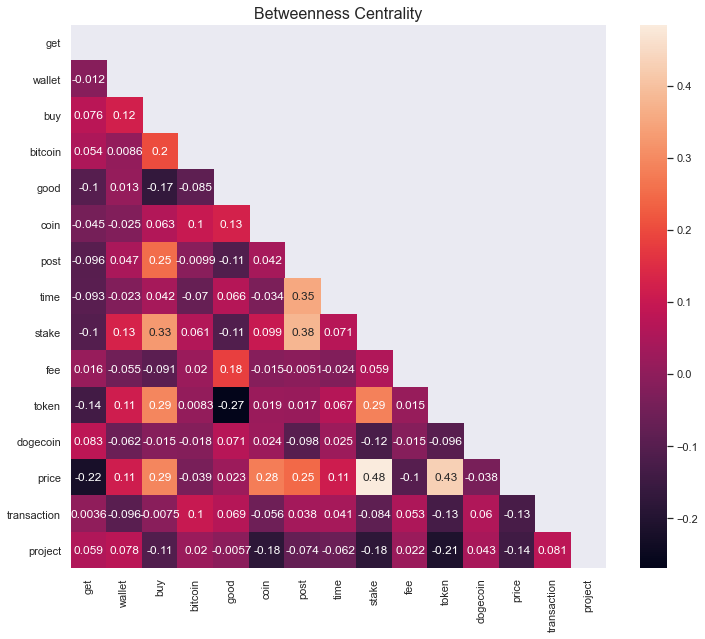

,get,wallet,buy,bitcoin,good,coin,post,time,stake,fee,token,dogecoin,price,transaction,project
2021-01-01,0.521337,0.125840,0.511380,0.319346,0.030030,0.028028,0.024893,0.002604,0.168168,0.000000,0.114744,0.000000,0.023106,0.000000,0.0
2021-01-02,0.091947,0.125840,0.020798,0.062255,0.030030,0.028028,0.017844,0.002604,0.168168,0.000000,0.114744,0.000000,0.023106,0.000000,0.0
2021-01-03,0.040546,0.055871,0.030761,0.037074,0.030030,0.028028,0.010795,0.002604,0.168168,0.000000,0.114744,0.000000,0.023106,0.000000,0.0
2021-01-04,0.076786,0.174925,0.095095,0.072823,0.030030,0.028028,0.009549,0.008484,0.168168,0.000000,0.114744,0.000000,0.041805,0.000000,0.0
2021-01-05,0.113025,0.124875,0.039076,0.171429,0.033534,0.108403,0.008303,0.014364,0.168168,0.060504,0.114744,0.000000,0.060504,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-26,0.149495,0.079798,0.105303,0.134146,0.030556,0.049683,0.106602,0.063526,0.032902,0.000000,0.053621,0.000000,0.003151,0.000000,0.0
2021-06-27,0.190256,0.104645,0.013514,0.134146,0.030556,0.049683,0.106602,0.063526,0.059725,0.037696,0.041385,0.000000,0.003151,0.000000,0.0
2021-06-28,0.221987,0.129493,0.048512,0.134146,0.030556,0.049683,0.106602,0.063526,0.086549,0.000000,0.029149,0.000000,0.003151,0.000000,0.0
2021-06-29,0.178647,0.106237,0.083510,0.134146,0.030556,0.049683,0.106602,0.063526,0.113372,0.000000,0.016913,0.000000,0.003151,0.065275,0.0


In [40]:
bc = []
for i in range(num_of_timeframes):
    betweenness_centrality = nx.betweenness_centrality(G_list[i])
    bc = bc + sorted(betweenness_centrality.items(), key=lambda x:x[1], reverse=True)[:15]
sorted_dict = get_sorted_dict(bc)
sorted_topics = list(sorted_dict.keys())[:15]

time_series = []
for i in range(len(sorted_topics)):
    for j in range(num_of_timeframes):
        c = bc[j*15 : (j+1)*15]
        t_list, c_list =  zip(*c)
        if sorted_topics[i] in t_list: 
            for k in range(15):
                if c[k][0] == sorted_topics[i]:
                    time_series.append(c[k][1])
                    break
        else:
            time_series.append(None)

time_series = np.reshape(time_series, (len(sorted_topics), num_of_timeframes))
df_top_centrality = pd.DataFrame(time_series.T, index=dates, columns=sorted_topics).apply(pd.to_numeric)
df_top_centrality.interpolate(method ='linear', limit_direction ='forward', inplace = True)
df_top_centrality.interpolate(method ='linear', limit_direction ='backward', inplace = True)

sns.set(rc={'figure.figsize':(12, 10)})
corrMatrix = df_top_centrality.corr()
matrix = np.triu(df_top_centrality.corr())
sns.heatmap(corrMatrix, annot=True, mask=matrix)
plt.title('Betweenness Centrality', fontsize=16)
plt.savefig('../image_demo_6_months/Correaltion matrix for betweenness centraity.png', dpi = 500)
plt.show()

df_top_centrality

#### - In degree centrality -

In [41]:
idc = []
for i in range(num_of_timeframes):
    in_degree_centrality = G_list[i].in_degree()
    idc = idc + sorted(in_degree_centrality, key=lambda x:x[1], reverse=True)[:3]

idc = np.reshape(idc, (num_of_timeframes, 6))
df_idc = pd.DataFrame(idc)
df_idc.index = dates
for i in range(1, 6, 2):
    df_idc[i] = df_idc[i].astype(float).round(2)

df_idc.rename(columns={0: 'Top 1', 1: 'In Degree centrality 1',
                      2: 'Top 2', 3: 'In Degree centrality 2',
                      4: 'Top 3', 5: 'In Degree centrality 3',}, inplace=True)
df_idc

,Top 1,In Degree centrality 1,Top 2,In Degree centrality 2,Top 3,In Degree centrality 3
2021-01-01,get,22.0,buy,17.0,bitcoin,16.0
2021-01-02,hold,11.0,run,9.0,get,9.0
2021-01-03,price,15.0,bitcoin,10.0,get,9.0
2021-01-04,coin,13.0,market,11.0,exchange,8.0
2021-01-05,get,18.0,smart,9.0,worth,9.0
...,...,...,...,...,...,...
2021-06-26,good,14.0,fee,9.0,lettre,9.0
2021-06-27,get,13.0,hold,12.0,transaction,8.0
2021-06-28,many,16.0,bank,15.0,day,13.0
2021-06-29,stake,10.0,green,9.0,trillion,9.0


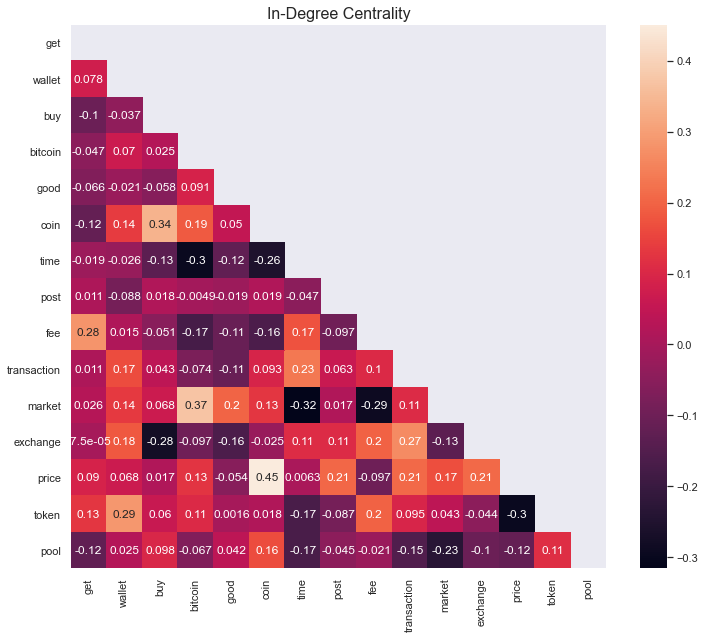

,get,wallet,buy,bitcoin,good,coin,time,post,fee,transaction,market,exchange,price,token,pool
2021-01-01,22.0,9.0,17.000000,16.0,10.0,13.000000,7.0,13.000000,7.00,8.0,11.000000,8.0,15.000000,9.0,7.0
2021-01-02,9.0,9.0,8.000000,8.0,10.0,13.000000,7.0,12.428571,7.00,8.0,11.000000,8.0,15.000000,9.0,7.0
2021-01-03,9.0,8.0,8.000000,10.0,10.0,13.000000,7.0,11.857143,7.00,8.0,11.000000,8.0,15.000000,9.0,7.0
2021-01-04,13.5,8.0,7.000000,8.5,10.0,13.000000,7.0,11.285714,7.00,8.0,11.000000,8.0,14.363636,9.0,7.0
2021-01-05,18.0,10.0,10.000000,7.0,10.0,12.772727,7.0,10.714286,7.00,8.0,10.846154,8.0,13.727273,9.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-26,11.0,8.0,7.727273,9.0,14.0,8.000000,12.0,17.000000,9.00,8.4,9.000000,9.0,8.333333,9.0,9.0
2021-06-27,13.0,8.0,7.818182,9.0,14.0,8.000000,12.0,17.000000,8.75,8.0,9.000000,9.0,8.000000,9.0,9.0
2021-06-28,9.0,8.0,7.909091,9.0,14.0,8.000000,12.0,17.000000,8.50,8.0,9.000000,9.0,8.000000,9.0,9.0
2021-06-29,9.0,8.0,8.000000,9.0,14.0,8.000000,12.0,17.000000,8.25,8.0,9.000000,9.0,8.000000,9.0,9.0


In [47]:
idc = []
for i in range(num_of_timeframes):
    in_degree_centrality = G_list[i].in_degree()
    idc = idc + sorted(in_degree_centrality, key=lambda x:x[1], reverse=True)[:15]
sorted_dict = get_sorted_dict(idc)
sorted_topics = list(sorted_dict.keys())[:15]

time_series = []
for i in range(len(sorted_topics)):
    for j in range(num_of_timeframes):
        c = idc[j*15 : (j+1)*15]
        t_list, c_list =  zip(*c)
        if sorted_topics[i] in t_list:
            for k in range(15):
                if c[k][0] == sorted_topics[i]:
                    time_series.append(c[k][1])
                    break
        else:
            time_series.append(None)

time_series = np.reshape(time_series, (len(sorted_topics), num_of_timeframes))
df_top_centrality = pd.DataFrame(time_series.T, index=dates, columns=sorted_topics).apply(pd.to_numeric)
df_top_centrality.interpolate(method ='linear', limit_direction ='forward', inplace = True)
df_top_centrality.interpolate(method ='linear', limit_direction ='backward', inplace = True)

sns.set(rc={'figure.figsize':(12, 10)})
corrMatrix = df_top_centrality.corr()
matrix = np.triu(df_top_centrality.corr())
sns.heatmap(corrMatrix, annot=True, mask=matrix)
plt.title('In-Degree Centrality', fontsize=16)
plt.savefig('../image_demo_6_months/Correaltion matrix for in-degree centraity.png', bbox_inches='tight', dpi = 500)
plt.show()

df_top_centrality


#### - Out degree centrality -

In [43]:
odc = []
for i in range(num_of_timeframes):
    out_degree_centrality = G_list[i].out_degree()
    odc = odc + sorted(out_degree_centrality, key=lambda x:x[1], reverse=True)[:3]

odc = np.reshape(odc, (num_of_timeframes, 6))
df_odc = pd.DataFrame(odc)
df_odc.index = dates
for i in range(1, 6, 2):
    df_odc[i] = df_odc[i].astype(float).round(2)

df_odc.rename(columns={0: 'Top 1', 1: 'In Degree centrality 1',
                      2: 'Top 2', 3: 'In Degree centrality 2',
                      4: 'Top 3', 5: 'In Degree centrality 3',}, inplace=True)
df_odc

,Top 1,In Degree centrality 1,Top 2,In Degree centrality 2,Top 3,In Degree centrality 3
2021-01-01,get,22.0,buy,17.0,bitcoin,16.0
2021-01-02,wallet,25.0,bitcoin,19.0,get,18.0
2021-01-03,get,22.0,wallet,21.0,bitcoin,18.0
2021-01-04,wallet,23.0,community,20.0,buy,16.0
2021-01-05,fee,15.0,price,15.0,bitcoin,13.0
...,...,...,...,...,...,...
2021-06-26,buy,21.0,get,19.0,wallet,18.0
2021-06-27,get,23.0,fee,12.0,gas,12.0
2021-06-28,get,26.0,many,12.0,bank,10.0
2021-06-29,buy,24.0,get,19.0,transaction,14.0


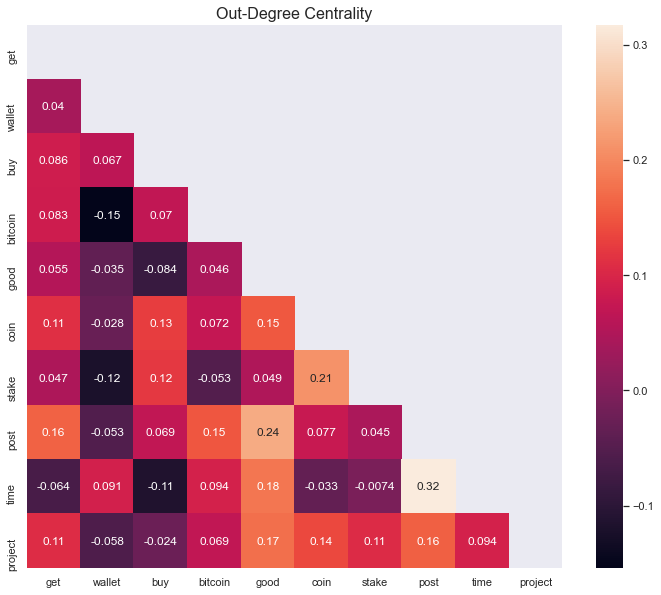

,get,wallet,buy,bitcoin,good,coin,stake,post,time,project
2021-01-01,22.0,25.0,17.0,16.0,13.00,7.0,7.000000,13.0,11.000000,9.0
2021-01-02,18.0,25.0,16.0,19.0,13.00,7.0,7.000000,9.0,11.000000,9.0
2021-01-03,22.0,21.0,16.0,18.0,13.00,7.0,7.000000,15.0,11.000000,9.0
2021-01-04,15.5,23.0,16.0,10.0,13.00,7.0,7.000000,7.0,10.818182,9.0
2021-01-05,9.0,7.0,20.5,13.0,12.75,10.0,7.333333,9.0,10.636364,9.0
...,...,...,...,...,...,...,...,...,...,...
2021-06-26,19.0,18.0,21.0,15.0,9.00,15.0,11.750000,12.0,9.272727,8.0
2021-06-27,23.0,13.5,9.0,15.0,9.00,15.0,12.500000,12.0,9.181818,7.0
2021-06-28,26.0,9.0,16.5,15.0,9.00,15.0,13.250000,12.0,9.090909,8.0
2021-06-29,19.0,9.0,24.0,15.0,9.00,15.0,14.000000,12.0,9.000000,9.0


In [44]:
odc = []
for i in range(num_of_timeframes):
    out_degree_centrality = G_list[i].out_degree()
    odc = odc + sorted(out_degree_centrality, key=lambda x:x[1], reverse=True)[:10]

sorted_dict = get_sorted_dict(odc)
sorted_topics = list(sorted_dict.keys())[:10]

time_series = []
for i in range(len(sorted_topics)):
    for j in range(num_of_timeframes):
        c = odc[j*10 : (j+1)*10]
        t_list, c_list =  zip(*c)
        if sorted_topics[i] in t_list:
            for k in range(10):
                if c[k][0] == sorted_topics[i]:
                    time_series.append(c[k][1])
                    break
        else:
            time_series.append(None)

time_series = np.reshape(time_series, (len(sorted_topics), num_of_timeframes))
df_top_centrality = pd.DataFrame(time_series.T, index=dates, columns=sorted_topics).apply(pd.to_numeric)
df_top_centrality.interpolate(method ='linear', limit_direction ='forward', inplace = True)
df_top_centrality.interpolate(method ='linear', limit_direction ='backward', inplace = True)

sns.set(rc={'figure.figsize':(12, 10)})
corrMatrix = df_top_centrality.corr()
matrix = np.triu(df_top_centrality.corr())
sns.heatmap(corrMatrix, annot=True, mask=matrix)
plt.title('Out-Degree Centrality', fontsize=16);
plt.savefig('../image_demo_6_months/Correaltion matrix for out-degree centraity.png', dpi = 500)
plt.show()

df_top_centrality

### • Changes in topology

In [60]:
n = len(union_topics_list)
num_topics = [len(topics) for topics in union_topics_list]
num_new_topics = [None] * n
num_preexisting_topics = [None] * n
num_disappearing_topics = [None] * n
perc_new_topics = [None] * n
perc_preexisting_topics = [None] * n


for i in range(n-1):
    num_new_topics[i+1] = len(list(set(union_topics_list[i+1]) - set(union_topics_list[i])))
    num_preexisting_topics[i+1] = len(list(set(union_topics_list[i+1]) & set(union_topics_list[i])))
    num_disappearing_topics[i+1] = len(list(set(union_topics_list[i]) - set(union_topics_list[i+1])))
    perc_new_topics[i+1] = num_new_topics[i+1] / num_topics[i-1]
    perc_preexisting_topics[i+1] = num_preexisting_topics[i+1] / num_topics[i-1]

In [61]:
data = {'No. of topics': num_topics,
        'No. of new topics': num_new_topics,
        '% new topics': perc_new_topics,
        'No. of pre-existing topics': num_preexisting_topics,
        '% pre-existing topics': perc_preexisting_topics,
        'No. of disappearing topics': num_disappearing_topics}


df_topology = pd.DataFrame(data)
df_topology.index = dates #['TF ' + str(i+1) for i in range(n)]
df_topology = df_topology.fillna(0)

df_topology['No. of new topics']= df_topology['No. of new topics'].astype(int)
df_topology['No. of pre-existing topics']= df_topology['No. of pre-existing topics'].astype(int)
df_topology['No. of disappearing topics']= df_topology['No. of disappearing topics'].astype(int)

df_topology['% new topics']= df_topology['% new topics'].apply(lambda x: float(format(x*100, '.1f')))
df_topology['% pre-existing topics']= df_topology['% pre-existing topics'].apply(lambda x: float(format(x*100, '.1f')))

df_topology

,No. of topics,No. of new topics,% new topics,No. of pre-existing topics,% pre-existing topics,No. of disappearing topics
2021-01-01,39,0,0.0,0,0.0,0
2021-01-02,36,23,51.1,13,28.9,26
2021-01-03,34,20,51.3,14,35.9,22
2021-01-04,38,23,63.9,15,41.7,19
2021-01-05,36,20,58.8,16,47.1,22
...,...,...,...,...,...,...
2021-06-26,46,33,70.2,13,27.7,32
2021-06-27,39,23,51.1,16,35.6,30
2021-06-28,45,27,58.7,18,39.1,21
2021-06-29,45,28,71.8,17,43.6,28


In [62]:
dfi.export(df_topology.head(5), '../image_demo_6_months/change_of_topology.png')

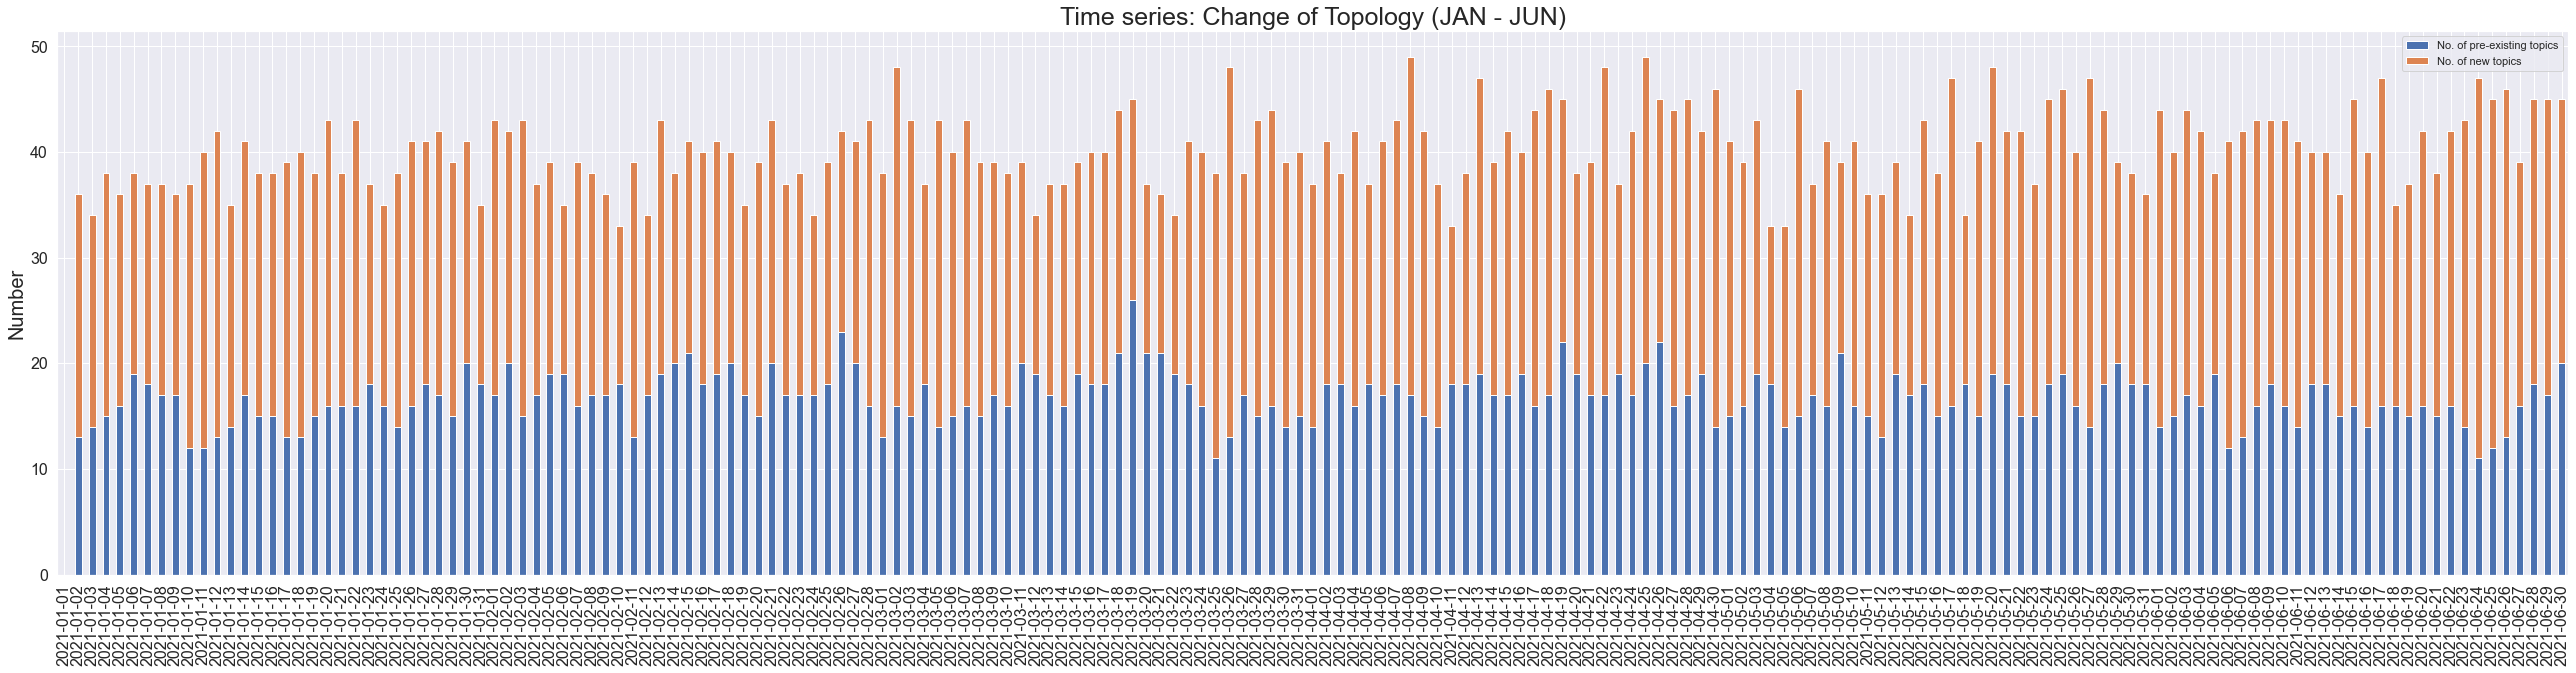

In [63]:
time_interval = df_topology.index.to_series().between('2021-01-01', '2021-06-30')
sns.set(rc={'figure.figsize':(45, 10)})
num_plot = ['No. of pre-existing topics', 'No. of new topics']
ax = df_topology[time_interval][num_plot].plot.bar(stacked = True)
ax.set_title('Time series: Change of Topology (JAN - JUN)', fontsize=25)
ax.set_ylabel('Number', fontsize=20)
x_dates = df_topology[time_interval].index.strftime('%Y-%m-%d')
plt.yticks(fontsize = 16)
ax.set_xticklabels(labels=x_dates, fontsize = 16)
plt.savefig('../image_demo_6_months/Time series stacked barplot.png', bbox_inches='tight', dpi = 500)

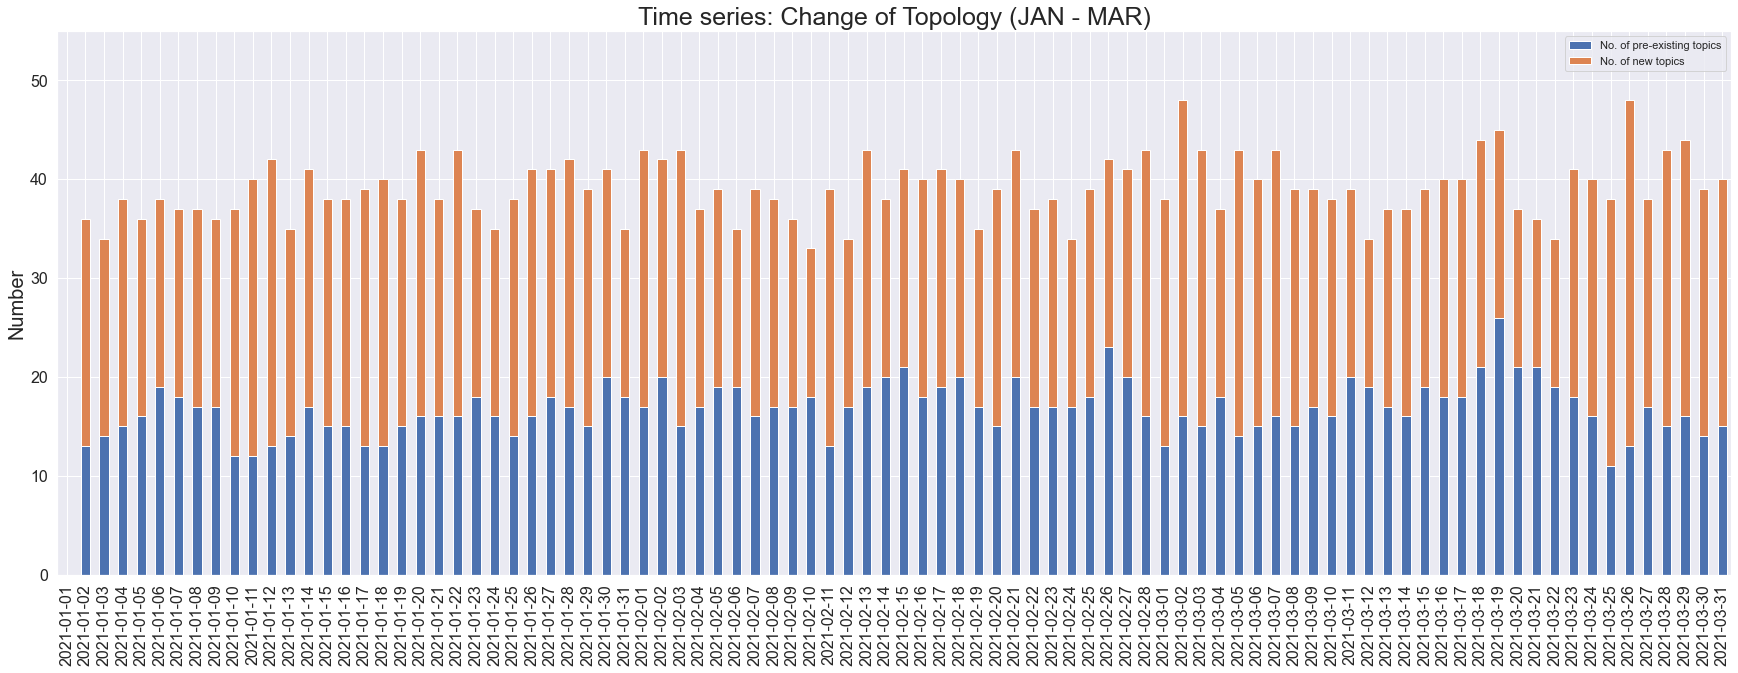

In [64]:
time_interval = df_topology.index.to_series().between('2021-01-01', '2021-03-31')
sns.set(rc={'figure.figsize':(30, 10)})
num_plot = ['No. of pre-existing topics', 'No. of new topics']
ax = df_topology[time_interval][num_plot].plot.bar(stacked = True)
ax.set_title('Time series: Change of Topology (JAN - MAR)', fontsize=25)
ax.set_ylabel('Number', fontsize=20)
ax.set_ylim([0, 55])
x_dates = df_topology[time_interval].index.strftime('%Y-%m-%d')
plt.yticks(fontsize = 16)
ax.set_xticklabels(labels=x_dates, fontsize = 16)
plt.savefig('../image_demo_6_months/Time series stacked barplot 1-3.png', bbox_inches='tight', dpi = 500)

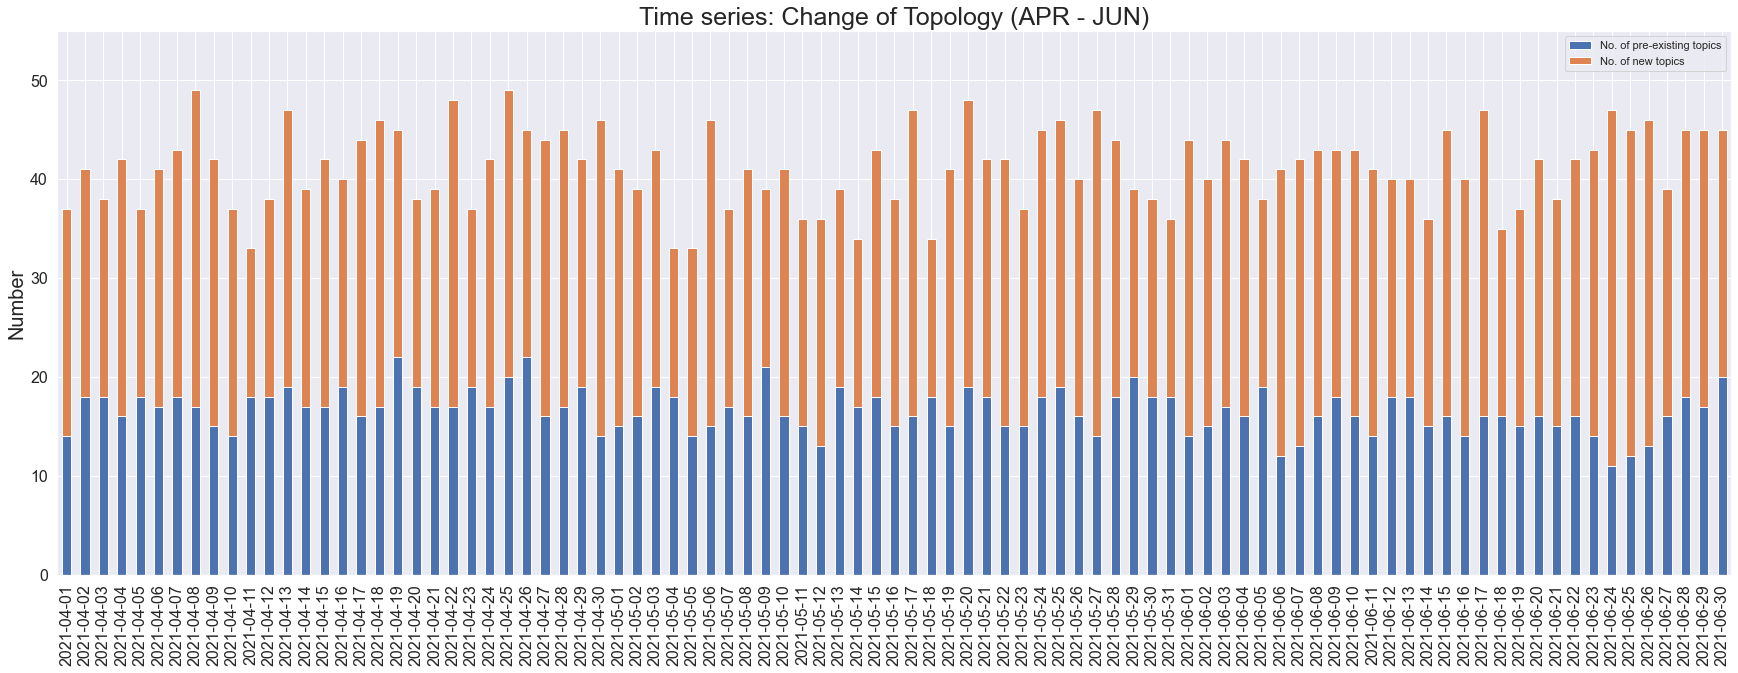

In [65]:
time_interval = df_topology.index.to_series().between('2021-04-01', '2021-06-30')
sns.set(rc={'figure.figsize':(30, 10)})
num_plot = ['No. of pre-existing topics', 'No. of new topics']
ax = df_topology[time_interval][num_plot].plot.bar(stacked = True)
ax.set_title('Time series: Change of Topology (APR - JUN)', fontsize=25)
ax.set_ylabel('Number', fontsize=20)
ax.set_ylim([0, 55])
x_dates = df_topology[time_interval].index.strftime('%Y-%m-%d')
plt.yticks(fontsize = 16)
ax.set_xticklabels(labels=x_dates, fontsize = 16)
plt.savefig('../image_demo_6_months/Time series stacked barplot 4-6.png', bbox_inches='tight', dpi = 500)

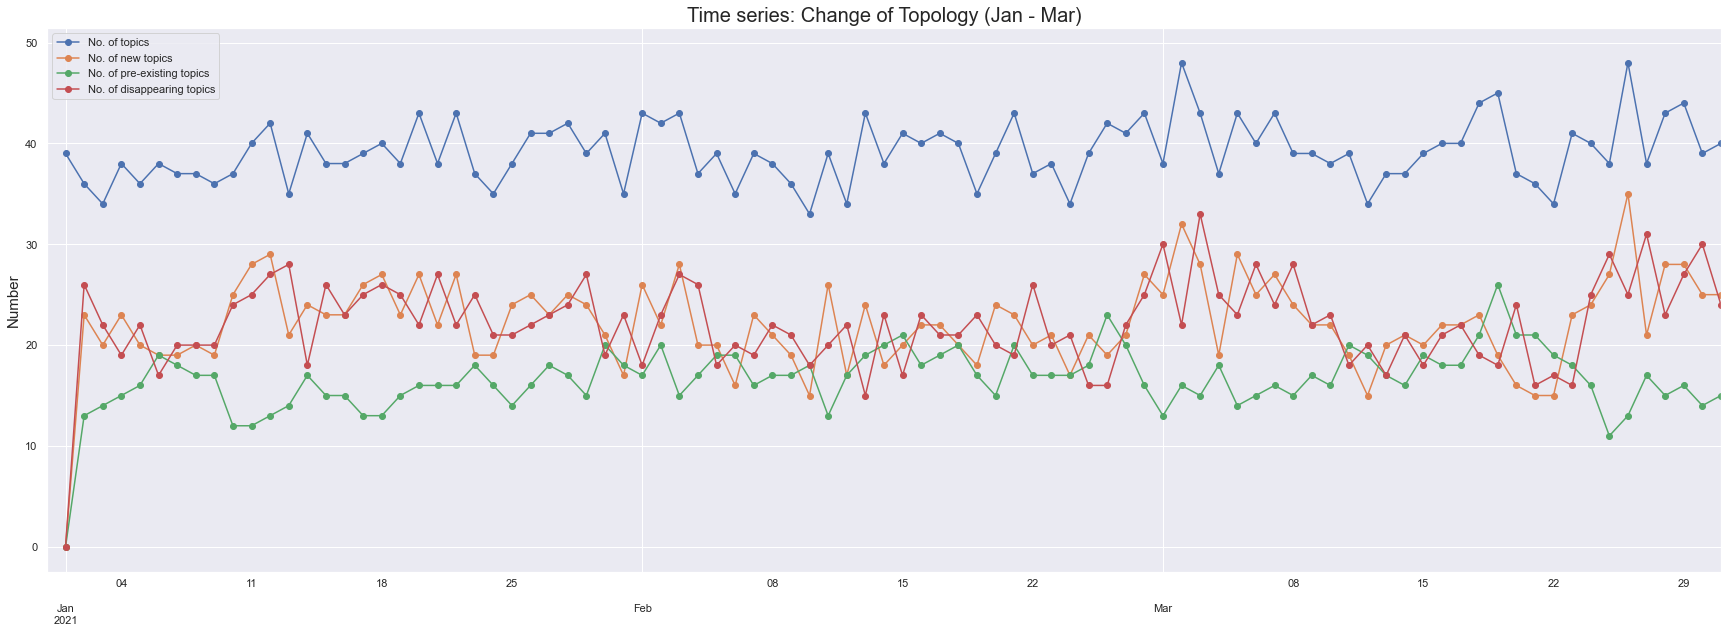

In [66]:
sns.set(rc={'figure.figsize':(30, 10)})
num_plot = ['No. of topics', 'No. of new topics','No. of pre-existing topics', 'No. of disappearing topics']
ax = df_topology[num_plot].plot(marker='o')
ax.set_title('Time series: Change of Topology (Jan - Mar)', fontsize=20)
ax.set_ylabel('Number', fontsize=15)
ax.set_xlim('2020-12-31', '2021-03-31')
plt.savefig('../image_demo_6_months/Time series 1-3.png', dpi = 500)

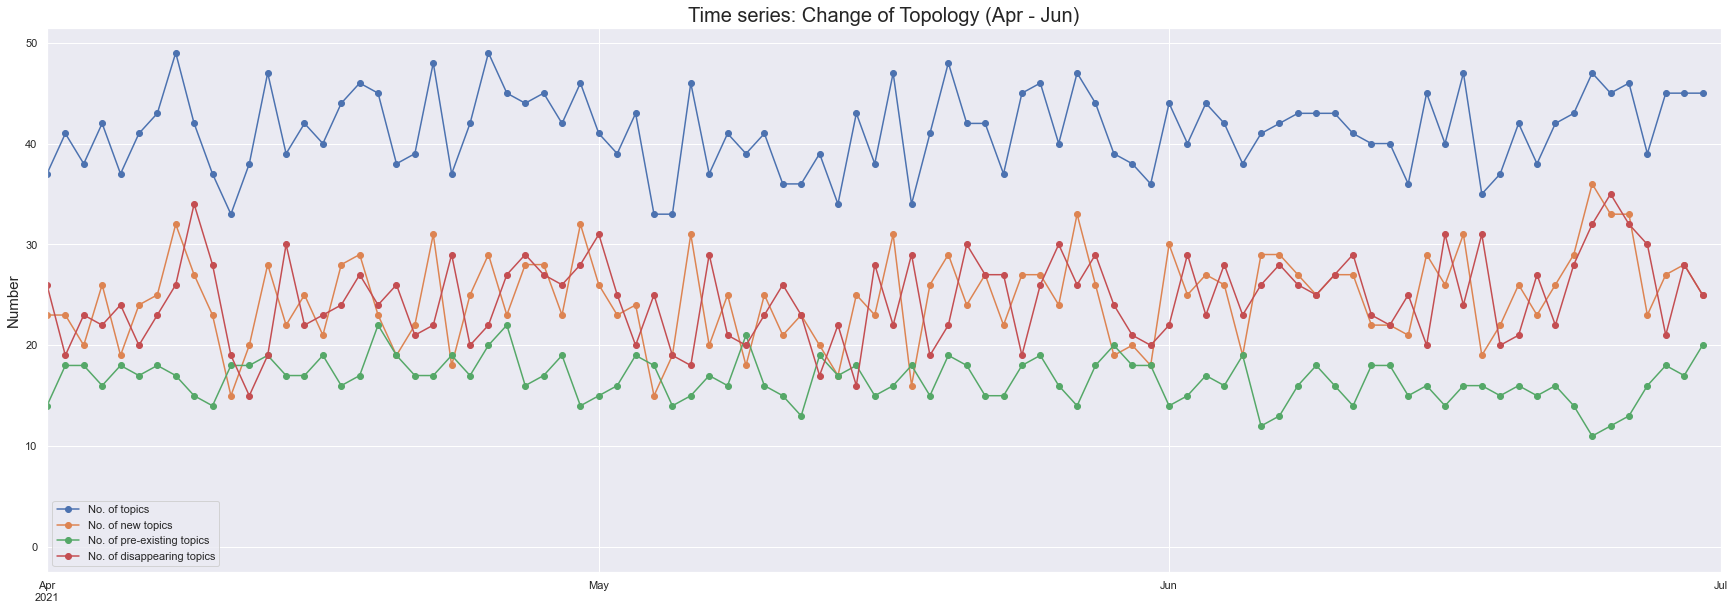

In [67]:
sns.set(rc={'figure.figsize':(30, 10)})
num_plot = ['No. of topics', 'No. of new topics','No. of pre-existing topics', 'No. of disappearing topics']
ax = df_topology[num_plot].plot(marker='o')
ax.set_title('Time series: Change of Topology (Apr - Jun)', fontsize=20)
ax.set_ylabel('Number', fontsize=15)
ax.set_xlim('2021-04-01', '2021-07-01')
plt.savefig('../image_demo_6_months/Time series 4-6.png', dpi = 500)